In [2]:
import pandas as pd
import geopandas as gpd
import seaborn as sns

## Part 1: Loading Data

In [3]:
data = pd.read_csv("../data/wbezchicago-chicago-police-tss-cards/all_CPD_car_stops.csv",dtype={"ZIP_CD":str})

/Users/eric/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (10,19,20,23,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# Coerce date strings to datetime object. Note: CONTACT_HOUR is the integer hour of day
data = data.assign(CONTACT_DATE = pd.to_datetime(data.CONTACT_DATE, format = "%Y-%m-%d").dt.date)

## Part 2: Understanding Data Ranges, Resolution, Distribution

### Part 2a: Dates Covered

'Dates range from 2004-01-01 to 2020-01-29'

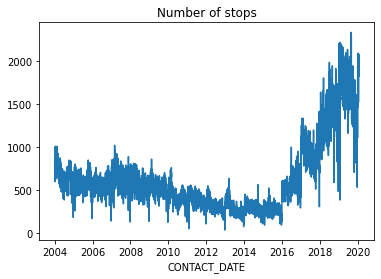

In [5]:
# Find date ranges 
data.groupby(by = "CONTACT_DATE").count()["CPD_UNIT_NO"].plot(title="Number of stops")
"Dates range from {} to {}".format(data.CONTACT_DATE.min(), data.CONTACT_DATE.max())

### Part 2b: Spatial (Beats)

[Text(0.5, 1.0, 'Stops by Police Beat')]

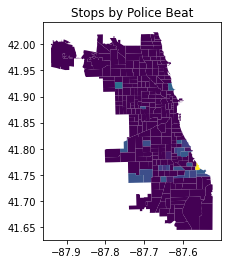

In [6]:
# Load in police beat geometries
beat_geos = gpd.read_file("../data/Boundaries - Police Beats (current).geojson")
beat_geos = beat_geos.assign(beat_num = beat_geos.beat_num.astype(int))

# Join the stops to geos by beat
beat_counts = data.BEAT.value_counts().reset_index().rename(columns = {"index":"beat_num","BEAT":"cnt"})
beat_count_geos = beat_counts.join(beat_geos, on = "beat_num", how = 'right', lsuffix='.lhs', rsuffix='.rhs')

# Plot frequency of stops per beat
from geopandas import GeoDataFrame
beat_count_geos = GeoDataFrame(beat_count_geos)
beat_count_geos.set_geometry("geometry")
beat_count_geos.cnt.fillna(0, inplace=True)
beat_count_geos.plot("cnt").set(title = "Stops by Police Beat")

[Text(0.5, 1.0, 'Stops by Police Submitting Beat')]

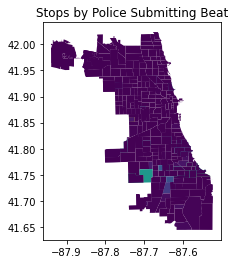

In [7]:
# Join the stops to geos by beat
beat_counts = data.SUBMITTING_BEAT_CD.value_counts().reset_index() \
    .rename(columns={"index":"beat_num","SUBMITTING_BEAT_CD":"cnt"}) \

beat_counts = beat_counts.assign(beat_num = pd.to_numeric(beat_counts.beat_num, errors='coerce'))
beat_count_geos = beat_counts.join(beat_geos, on = "beat_num", how = 'right', lsuffix='.lhs', rsuffix='.rhs')

# Plot frequency of stops per beat
beat_count_geos = GeoDataFrame(beat_count_geos)
beat_count_geos.set_geometry("geometry")
beat_count_geos.cnt.fillna(0, inplace=True)
beat_count_geos.plot("cnt").set(title = "Stops by Police Submitting Beat")

### Part 2c: Spatial (zips)

[Text(0.5, 1.0, 'Stops by Zip')]

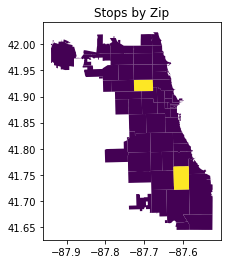

In [8]:
# Load in police beat geometries
zip_geos = gpd.read_file("../data/Boundaries - ZIP Codes.geojson")
zip_geos["ZIPNBR"] = pd.to_numeric(zip_geos.zip)

# Join the stops to geos by beat
zip_counts = data.ZIP_CD.value_counts().reset_index().rename(columns={"ZIP_CD":"cnt","index":"zip"})
zip_counts["ZIPNBR"] = pd.to_numeric(zip_counts.zip, downcast='integer',errors='coerce')
zip_count_geos = zip_counts.join(zip_geos, on = "ZIPNBR", how = 'right', lsuffix='.lhs', rsuffix='.rhs')

# Plot frequency of stops per beat
zip_count_geos = GeoDataFrame(zip_count_geos)
zip_count_geos.set_geometry("geometry")
zip_count_geos.cnt.fillna(0, inplace=True)
zip_count_geos.plot("cnt").set(title = "Stops by Zip")

### Part 2d: Spatial (community areas)

[Text(0.5, 1.0, 'Stops by Community Area')]

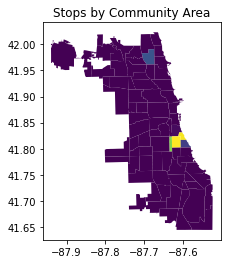

In [9]:
# Load in police beat geometries
area_geos = gpd.read_file("../data/Boundaries-Community-Areas.geojson").filter(['community','area_numbe','geometry'])

# Join the stops to geos by beat
area_counts = data.AREA.value_counts().reset_index().rename(columns={"AREA":"cnt","index":"area_numbe"})
area_count_geos = area_counts.join(area_geos, on = "area_numbe", how = 'right', lsuffix='.lhs', rsuffix='.rhs')

# Plot frequency of stops per beat
area_count_geos = GeoDataFrame(area_count_geos)
area_count_geos.set_geometry("geometry")
area_count_geos.cnt.fillna(0, inplace=True)
area_count_geos.plot("cnt").set(title = "Stops by Community Area")

### Part 2e: Spatial (Wards)

[Text(0.5, 1.0, 'Stops by Alderman Ward')]

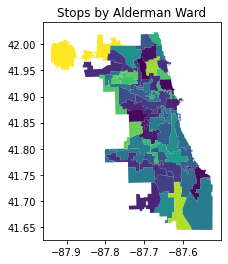

In [10]:
# Load in ward geometries
ward_geos = gpd.read_file("../data/Boundaries - Wards (2015-).geojson")

# Join the stops to geos by beat
ward_counts = data.WARD.value_counts().reset_index().rename(columns={"WARD":"cnt","index":"ward"})
ward_count_geos = ward_counts.join(ward_geos, on = "ward", how = 'right', lsuffix='.lhs', rsuffix='.rhs')

# Plot frequency of stops per beat
ward_count_geos = GeoDataFrame(ward_count_geos)
ward_count_geos.set_geometry("geometry")
ward_count_geos.cnt.fillna(0, inplace=True)
ward_count_geos.plot("cnt").set(title = "Stops by Alderman Ward")

### Part 2f: Spatial (Police Districts)

[Text(0.5, 1.0, 'Stops by Police District')]

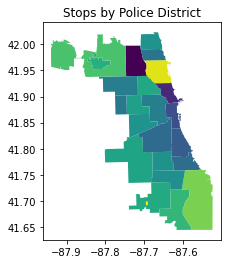

In [12]:
# Load in police district geometries
distr_geos = gpd.read_file("../data/Boundaries - Police Districts (current).geojson")

# Join the stops to geos by beat
distr_counts = data.DISTRICT.value_counts().reset_index().rename(columns={"DISTRICT":"cnt","index":"dist_num"})
distr_count_geos = distr_counts.join(distr_geos, on = "dist_num", how = 'right', lsuffix='.lhs', rsuffix='.rhs')

# # Plot frequency of stops per beat
distr_count_geos = GeoDataFrame(distr_count_geos)
distr_count_geos.set_geometry("geometry")
distr_count_geos.cnt.fillna(0, inplace=True)
distr_count_geos.plot("cnt").set(title = "Stops by Police District")

### Part 2g: Spatial (fishy aggregations)

In [19]:
data_spatials = data.filter(['ZIP_CD','DISTRICT','BEAT','AREA','WARD']) \
    .assign(ZIP_CD = pd.to_numeric(data.ZIP_CD, errors='coerce')) \
    .assign(AREA = pd.to_numeric(data.AREA, errors='coerce')) \
    .assign(WARD = pd.to_numeric(data.WARD, errors='coerce'))

In [14]:
len(data_spatials.ZIP_CD.unique())

399

In [15]:
len(data_spatials.DISTRICT.unique())

27

In [16]:
len(data_spatials.BEAT.unique())

305

In [17]:
len(data_spatials.AREA.unique())

7

In [20]:
len(data_spatials.WARD.unique())

52

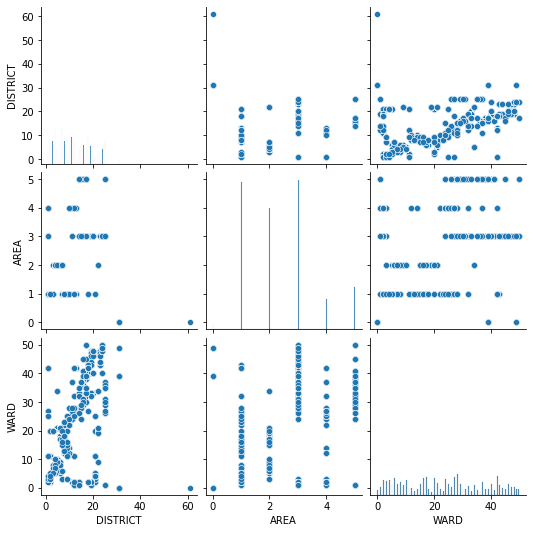

In [21]:
sns.pairplot(data_spatials, vars=["DISTRICT","AREA","WARD"])

In [51]:
zip_debug = data_spatials.ZIP_CD.value_counts()
weird_zips = zip_debug[zip_debug == 1]
frac_singular = 100 * len(weird_zips) / len(zip_debug)
frac_chi = 100 * (1 - len(pd.Index(zip_geos["ZIPNBR"]).intersection(zip_counts["ZIPNBR"])) / len(zip_debug))
"{:.2f}% of the zip codes only have one incident, and {:.2f}% of them aren't in Chicago!".format(frac_singular, frac_chi)

"54.77% of the zip codes only have one incident, and 85.18% of them aren't in Chicago!"